In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

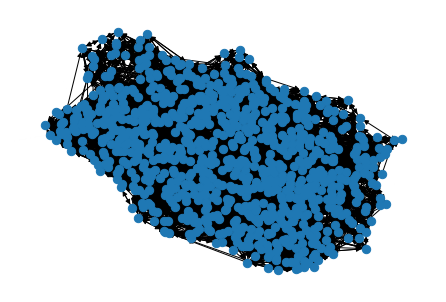

In [12]:
side = 30
sw = nx.navigable_small_world_graph(side, p=2, q=5)
options = {
#     'node_color': 'black',
    'node_size': 70,
    'width': 1,
}
nx.draw(sw, **options)

In [13]:
def vertex_num(vertex):
    return vertex[0] * 6 + vertex[1]

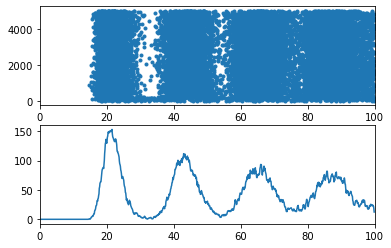

In [14]:
from brian2 import *

N = 5000
Vr = 10*mV
theta = 20*mV
tau = 20*ms
delta = 2*ms
taurefr = 2*ms
duration = .1*second
C = 1000
sparseness = float(C)/N
J = .1*mV
muext = 25*mV
sigmaext = 1*mV

eqs = """
dV/dt = (-V+muext + sigmaext * sqrt(tau) * xi)/tau : volt
"""

group = NeuronGroup(N, eqs, threshold='V>theta',
                    reset='V=Vr', refractory=taurefr, method='euler')
group.V = Vr

    
syn = Synapses(group, group, 'w : 1', on_pre='V += -J')
for edge in sw.edges:
    syn.connect(i=vertex_num(edge[0]), j=vertex_num(edge[1]))
    syn.w = 'j*0.2'




#conn = Synapses(group, group, on_pre='V += -J', delay=delta)
#conn.connect(p=sparseness)
M = SpikeMonitor(group)
LFP = PopulationRateMonitor(group)
net = Network(group, syn, M, LFP)
net.run(duration)

subplot(211)
plot(M.t/ms, M.i, '.')
xlim(0, duration/ms)

subplot(212)
plot(LFP.t/ms, LFP.smooth_rate(window='flat', width=0.5*ms)/Hz)
xlim(0, duration/ms)

show()

In [15]:
a = [1, 2, 3]
print(sum(a))

6


In [21]:
print(len(syn.i), len(syn.j), len(syn.w))

12954 12954 12954


In [23]:
syn.i

<synapses.i: array([  0,   0,   0, ..., 203, 203, 203])>

In [27]:
i = 0
k = 0
max_sum = 0
summ = 0
while i < 10:
    if syn.i[i] == k:
        summ += syn.w[i]
    else:
        if summ > max_sum:
            max_sum = summ
            k += 1
        summ = syn.w[i]
    i += 1
    print(i, k, syn.i[i], syn.w[i], summ, max_sum)

    # я не уверен, что оно ок работает для последнего нейрона
    # и еще надо добавить получение координат

print(max_sum)

1 0 0 0.4 0.2 0
2 0 0 1.2000000000000002 0.6000000000000001 0
3 0 0 1.4000000000000001 1.8000000000000003 0
4 0 0 2.4000000000000004 3.2 0
5 0 0 3.6 5.6000000000000005 0
6 0 1 0.0 9.200000000000001 0
7 1 1 0.4 0.0 9.200000000000001
8 1 1 0.6000000000000001 0.4 9.200000000000001
9 1 1 1.2000000000000002 1.0 9.200000000000001
10 1 1 1.4000000000000001 2.2 9.200000000000001
9.200000000000001
